# Credit Card Defaulters

In [1]:
### importing required dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
### importing the data 

data=pd.read_csv('E:/dat/creditcard.csv')

In [3]:
### reading first 5 rows data

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
### Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
### Checking any NaN values in dataset

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
### Distribution of trasaction

data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

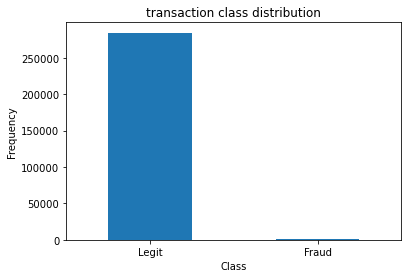

In [7]:
### visualise the transaction distribution

count_classes=pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('transaction class distribution')
plt.xticks(range(2),('Legit','Fraud'))
plt.xlabel('Class')
plt.ylabel('Frequency')

In [8]:
plt.savefig('Distribution of transaction.png', dpi=150)

<Figure size 432x288 with 0 Axes>

## From this we can say the dataset is highly imbalanced

0 --->  Normal trasaction or Legit

1 --->  Fraudulent

In [9]:
### Storing the legit and fraudulent transaction separately

legit=data[data.Class==0]
fraudulent=data[data.Class==1]



In [10]:
## getting the shape of legit and fraudulent

print(legit.shape)
print(fraudulent.shape)

(284315, 31)
(492, 31)


In [11]:
# statiscal measures of the data

legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
### compare the values b/w the transaction

data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under Sampling





Build a sample dataset containing similar distribution of legit and fraudulent


Number of Fraudulent -----> 492

In [14]:
## Return a random sample of items from an axis of object

legit_sample=legit.sample(n=492)
legit_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
187818,127705.0,-0.222922,0.992796,-0.339625,3.224431,2.508282,0.056531,0.960217,0.016419,-2.566929,...,0.294541,0.576026,-0.168173,0.210260,0.029239,0.227953,0.004877,0.059981,0.76,0
221534,142600.0,-0.203604,0.583234,-2.842137,-0.504167,0.829264,-0.752890,2.164886,-0.051979,-0.528277,...,0.576030,1.344143,0.479941,0.061963,-0.973607,0.397206,0.283271,0.334392,240.16,0
228124,145367.0,-0.883057,0.010202,1.271981,-1.115747,-0.515749,-0.412280,1.476644,-0.141633,0.178529,...,-0.023568,-0.443962,0.507966,-0.000979,-0.284100,-0.436244,0.036449,0.165877,238.05,0
31011,36174.0,1.336706,0.682405,-0.904426,0.670246,0.578866,-0.962794,0.437919,-0.302229,-0.210301,...,-0.201424,-0.485807,-0.195026,-0.548756,0.705153,0.418692,-0.027439,0.035798,0.76,0
275457,166542.0,-0.089938,0.511432,0.883198,-0.647320,-0.296266,-0.421553,0.408877,-0.038751,0.519104,...,-0.158415,-0.554058,0.296128,1.117239,-0.927755,0.077088,-0.260669,0.018302,41.93,0


In [15]:
### concating the data

new_dataset=pd.concat([legit_sample,fraudulent],axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
187818,127705.0,-0.222922,0.992796,-0.339625,3.224431,2.508282,0.056531,0.960217,0.016419,-2.566929,...,0.294541,0.576026,-0.168173,0.210260,0.029239,0.227953,0.004877,0.059981,0.76,0
221534,142600.0,-0.203604,0.583234,-2.842137,-0.504167,0.829264,-0.752890,2.164886,-0.051979,-0.528277,...,0.576030,1.344143,0.479941,0.061963,-0.973607,0.397206,0.283271,0.334392,240.16,0
228124,145367.0,-0.883057,0.010202,1.271981,-1.115747,-0.515749,-0.412280,1.476644,-0.141633,0.178529,...,-0.023568,-0.443962,0.507966,-0.000979,-0.284100,-0.436244,0.036449,0.165877,238.05,0
31011,36174.0,1.336706,0.682405,-0.904426,0.670246,0.578866,-0.962794,0.437919,-0.302229,-0.210301,...,-0.201424,-0.485807,-0.195026,-0.548756,0.705153,0.418692,-0.027439,0.035798,0.76,0
275457,166542.0,-0.089938,0.511432,0.883198,-0.647320,-0.296266,-0.421553,0.408877,-0.038751,0.519104,...,-0.158415,-0.554058,0.296128,1.117239,-0.927755,0.077088,-0.260669,0.018302,41.93,0


In [16]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93562.524390,0.054129,0.008164,0.018494,-0.004783,-0.043184,-0.043656,0.055058,-0.123478,0.088811,...,0.096944,0.011650,-0.006238,0.005923,-0.006475,0.030746,-0.046511,0.025021,-0.001286,106.023577
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [18]:
## Know dataset balanced by under sampling randomly
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

## Splitting the dataset into train & test data

In [19]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [20]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
187818,127705.0,-0.222922,0.992796,-0.339625,3.224431,2.508282,0.056531,0.960217,0.016419,-2.566929,...,0.057268,0.294541,0.576026,-0.168173,0.210260,0.029239,0.227953,0.004877,0.059981,0.76
221534,142600.0,-0.203604,0.583234,-2.842137,-0.504167,0.829264,-0.752890,2.164886,-0.051979,-0.528277,...,0.216669,0.576030,1.344143,0.479941,0.061963,-0.973607,0.397206,0.283271,0.334392,240.16
228124,145367.0,-0.883057,0.010202,1.271981,-1.115747,-0.515749,-0.412280,1.476644,-0.141633,0.178529,...,0.375265,-0.023568,-0.443962,0.507966,-0.000979,-0.284100,-0.436244,0.036449,0.165877,238.05
31011,36174.0,1.336706,0.682405,-0.904426,0.670246,0.578866,-0.962794,0.437919,-0.302229,-0.210301,...,-0.000508,-0.201424,-0.485807,-0.195026,-0.548756,0.705153,0.418692,-0.027439,0.035798,0.76
275457,166542.0,-0.089938,0.511432,0.883198,-0.647320,-0.296266,-0.421553,0.408877,-0.038751,0.519104,...,-0.217722,-0.158415,-0.554058,0.296128,1.117239,-0.927755,0.077088,-0.260669,0.018302,41.93


In [21]:
Y.head()

187818    0
221534    0
228124    0
31011     0
275457    0
Name: Class, dtype: int64

In [22]:
## splitting the dataset into train & test data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


## Model Building

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [25]:
model.fit(X_train,Y_train)

LogisticRegression()

In [26]:
y_pred0=model.predict(X_test)

## Model Evaluation

In [27]:
from sklearn import metrics

In [28]:
### model evaluation for test data

print("Accuracy_Score :",metrics.accuracy_score(Y_test,y_pred0))
print("Classification_Report :\n",metrics.classification_report(Y_test,y_pred0))
print('Confusion_Matrix :\n',metrics.confusion_matrix(Y_test,y_pred0))

Accuracy_Score : 0.9086294416243654
Classification_Report :
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        98
           1       0.95      0.87      0.91        99

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

Confusion_Matrix :
 [[93  5]
 [13 86]]


In [29]:
y_pred=model.predict(X_train)

In [30]:
### model evaluation for training data

print("Accuracy_Score :",metrics.accuracy_score(Y_train,y_pred))
print("Classification_Report :\n",metrics.classification_report(Y_train,y_pred))
print('Confusion_Matrix :\n',metrics.confusion_matrix(Y_train,y_pred))

Accuracy_Score : 0.9313850063532402
Classification_Report :
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       394
           1       0.97      0.89      0.93       393

    accuracy                           0.93       787
   macro avg       0.93      0.93      0.93       787
weighted avg       0.93      0.93      0.93       787

Confusion_Matrix :
 [[382  12]
 [ 42 351]]


# Hyper Parameter for Logistic Regression 

#
Logistic regression does have not really have any critical hyperparameters to tune.

Sometime few of them are imp. which can inhace the performance

->solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]

->penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]

->C in [100, 10, 1.0, 0.1, 0.01] C parameter controls the penality strength, which can also be effective

for all parameter of Logistic Regession :https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [32]:
#defining the parametres:

solvers=['newton-cg','lbfgs','liblinear','sag','saga']
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.001]

### GridSearchCV Hyperparameter

In [33]:
grid=dict(solver=solvers,penalty=penalty,C=c_values)
grid_search =GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,cv=5,scoring='accuracy',error_score=0,verbose=1)

In [34]:
grid=grid_search.fit(X_train,Y_train)
grid

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [35]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.950464 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


### RandomSearchCV

In [36]:
random=dict(solver=solvers,penalty=penalty,C=c_values)
random_search=RandomizedSearchCV(estimator=model,param_distributions=random,n_iter=5,scoring='accuracy',n_jobs=-1,random_state=1,error_score=0,cv=10,verbose=1)

In [37]:
random_cv=random_search.fit(X_train,Y_train)
random_cv

Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


RandomizedSearchCV(cv=10, error_score=0, estimator=LogisticRegression(),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.001],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=1, scoring='accuracy', verbose=1)

In [38]:
print("Best: %f using %s" % (random_cv.best_score_, random_cv.best_params_))

Best: 0.501899 using {'solver': 'saga', 'penalty': 'l1', 'C': 10}


### Using best parameter of GrindSearchCV and RandomSearchCV to build model

In [39]:
grid_model=LogisticRegression(C=0.1, penalty='l2', solver='newton-cg')
grid_model.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

LogisticRegression(C=0.1, solver='newton-cg')

In [40]:
y_pred1=grid_model.predict(X_test)

In [41]:
### model evaluation for test data

print("Accuracy_Score :",metrics.accuracy_score(Y_test,y_pred1))
print("Classification_Report :\n",metrics.classification_report(Y_test,y_pred1))
print('Confusion_Matrix :\n',metrics.confusion_matrix(Y_test,y_pred1))

Accuracy_Score : 0.9441624365482234
Classification_Report :
               precision    recall  f1-score   support

           0       0.91      0.99      0.95        98
           1       0.99      0.90      0.94        99

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197

Confusion_Matrix :
 [[97  1]
 [10 89]]


In [42]:
y_pred2=grid_model.predict(X_train)

In [43]:
### model evaluation for training data

print("Accuracy_Score :",metrics.accuracy_score(Y_train,y_pred2))
print("Classification_Report :\n",metrics.classification_report(Y_train,y_pred2))
print('Confusion_Matrix :\n',metrics.confusion_matrix(Y_train,y_pred2))

Accuracy_Score : 0.9542566709021602
Classification_Report :
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       394
           1       0.99      0.92      0.95       393

    accuracy                           0.95       787
   macro avg       0.96      0.95      0.95       787
weighted avg       0.96      0.95      0.95       787

Confusion_Matrix :
 [[389   5]
 [ 31 362]]


In [44]:
random_model=LogisticRegression(solver= 'saga', penalty= 'l1', C=10,verbose=1)
random_model.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=10, penalty='l1', solver='saga', verbose=1)

In [45]:
### model evaluation for test data

y_pred3=grid_model.predict(X_test)

print("Accuracy_Score :",metrics.accuracy_score(Y_test,y_pred3))
print("Classification_Report :\n",metrics.classification_report(Y_test,y_pred3))
print('Confusion_Matrix :\n',metrics.confusion_matrix(Y_test,y_pred3))

Accuracy_Score : 0.9441624365482234
Classification_Report :
               precision    recall  f1-score   support

           0       0.91      0.99      0.95        98
           1       0.99      0.90      0.94        99

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197

Confusion_Matrix :
 [[97  1]
 [10 89]]


In [46]:
### model evaluation for training data

y_pred4=grid_model.predict(X_train)

print("Accuracy_Score :",metrics.accuracy_score(Y_train,y_pred4))
print("Classification_Report :\n",metrics.classification_report(Y_train,y_pred4))
print('Confusion_Matrix :\n',metrics.confusion_matrix(Y_train,y_pred4))

Accuracy_Score : 0.9542566709021602
Classification_Report :
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       394
           1       0.99      0.92      0.95       393

    accuracy                           0.95       787
   macro avg       0.96      0.95      0.95       787
weighted avg       0.96      0.95      0.95       787

Confusion_Matrix :
 [[389   5]
 [ 31 362]]


### comparing accuracy of model to finalize the model

In [47]:
print("Accuracy_Score of general model of logistic :",metrics.accuracy_score(Y_train,y_pred))
print("Accuracy_Score of general model of logistic :",metrics.accuracy_score(Y_test,y_pred0))
print("Accuracy_Score of grid model of logistic :",metrics.accuracy_score(Y_train,y_pred2))
print("Accuracy_Score of grid model of logistic :",metrics.accuracy_score(Y_test,y_pred1))
print("Accuracy_Score of random model of logistic :",metrics.accuracy_score(Y_train,y_pred4))
print("Accuracy_Score of random model of logistic :",metrics.accuracy_score(Y_test,y_pred3))

Accuracy_Score of general model of logistic : 0.9313850063532402
Accuracy_Score of general model of logistic : 0.9086294416243654
Accuracy_Score of grid model of logistic : 0.9542566709021602
Accuracy_Score of grid model of logistic : 0.9441624365482234
Accuracy_Score of random model of logistic : 0.9542566709021602
Accuracy_Score of random model of logistic : 0.9441624365482234


### Accuracy of the model  is increased  by hyper parameter tuning and got stable model also

In [48]:
##saving the finalized model
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(grid_model, f)
